C:\Users\hsri2\AppData\Local\Temp\ipykernel_8072\3945379260.py:514: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month-Year', y='Average BMI', palette='coolwarm', ax=ax)
C:\Users\hsri2\AppData\Local\Temp\ipykernel_8072\3945379260.py:519: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Month-Year'], rotation=45, ha='right')


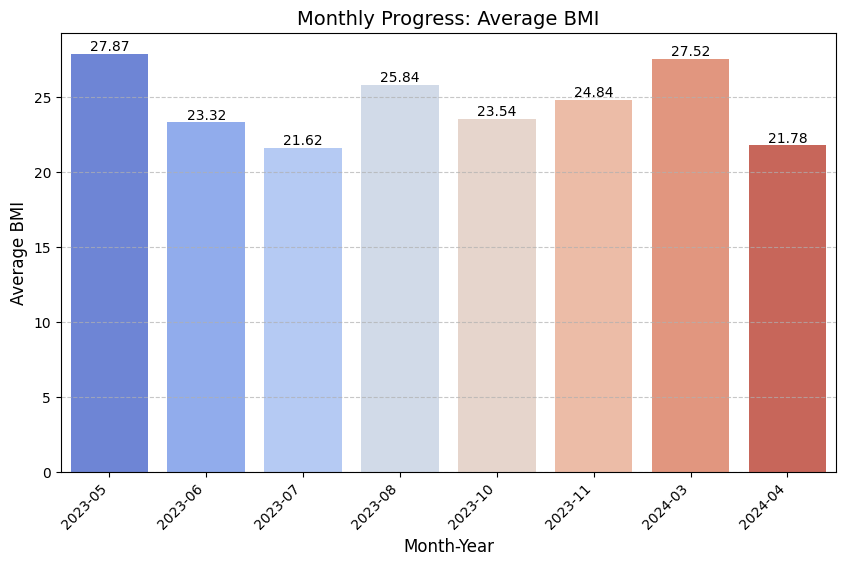

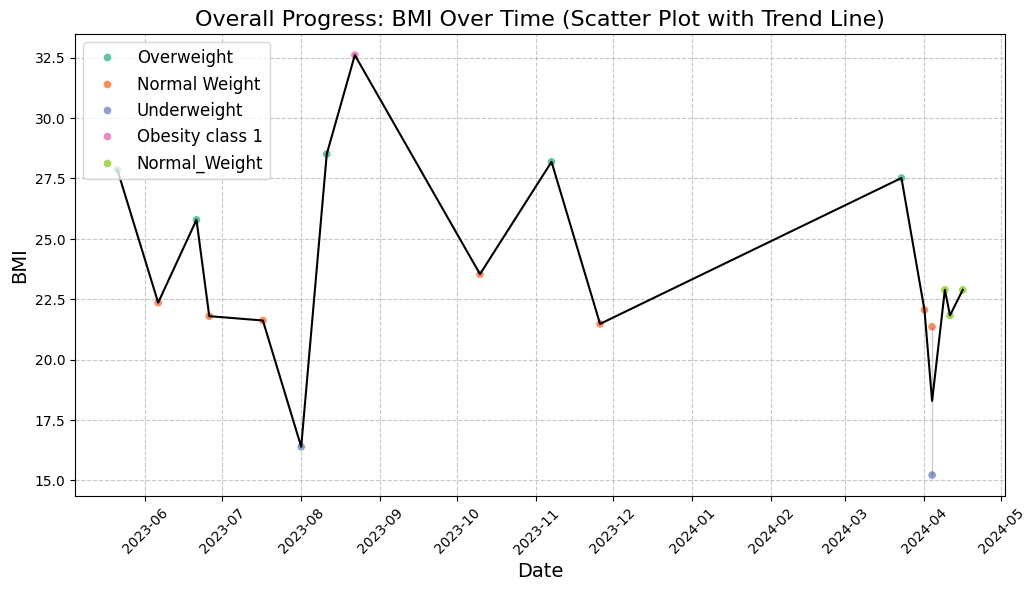

In [12]:

#                                                    BMI CALCULATOR
import tkinter as tk
from tkinter import ttk, messagebox, simpledialog
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import datetime as dt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.dates as mdates



class BMI_Calculator():
    def __init__(self):
        self.T = tk.Tk()
        self.T.title("BMI")
        self.frame = ttk.Frame(self.T, relief="raised")
        self.frame.pack()
        self.id = tk.Entry(self.frame, width=56)
        self.id.insert(0, "Enter Your User_ID")
        self.id.bind("<FocusIn>", self.on_id_focus_in)
        self.id.bind("<FocusOut>", self.on_id_focus_out)
        self.id.grid(row=0, columnspan=4, padx=20, pady=20)
        self.pass_word = tk.Entry(self.frame, width=56)
        self.pass_word.insert(0, "Enter Your Password")
        self.pass_word.bind("<FocusIn>", self.on_pass_word_focus_in)
        self.pass_word.bind("<FocusOut>", self.on_pass_word_focus_out)
        self.pass_word.grid(row=2, columnspan=4, padx=20, pady=20)
        forgot_user_name = tk.Label(self.frame, text='forgot_user_name', font=("Times New Roman", 12), cursor="hand2")
        forgot_user_name.grid(row=3, column=0, padx=10, pady=10, )
        forgot_user_name.bind("<Enter>", lambda event: forgot_user_name.config(font=("Times New Roman", 12, "underline")))
        forgot_user_name.bind("<Leave>", lambda event: forgot_user_name.config(font=("Times New Roman", 11)))
        forgot_user_name.bind("<Button-1>", lambda event: self.forget_info(is_forget_password=False))
        forgot_password = tk.Label(self.frame, text='forgot_password', font=("Times New Roman", 12), cursor="hand2")
        forgot_password.grid(row=3, column=3, padx=10, pady=10, )
        forgot_password.bind("<Enter>", lambda event: forgot_password.config(font=("Times New Roman", 12, "underline")))
        forgot_password.bind("<Leave>", lambda event: forgot_password.config(font=("Times New Roman", 11)))
        forgot_password.bind("<Button-1>", lambda event: self.forget_info(is_forget_password=True))
        self.button_2 = tk.Button(self.frame, text="Login", font=("Arial", 12), command=lambda: self.sing_in())
        self.button_2.grid(row=4, columnspan=4, padx=20, pady=20)
        register = tk.Label(self.frame, text='Register', font=("Times New Roman", 12), cursor="hand2")
        register.grid(row=5, columnspan=4, padx=10, pady=10, )
        register.bind("<Enter>", lambda event: register.config(font=("Times New Roman", 12, "underline")))
        register.bind("<Leave>", lambda event: register.config(font=("Times New Roman", 11)))
        register.bind("<Button-1>", lambda event: self.register())

        self.T.mainloop()   

    def on_id_focus_in(self, event):
        placeholder_text = "Enter Your User_ID"
        if self.id.get() == placeholder_text:
            self.id.delete(0, tk.END)         

    def on_id_focus_out(self, event):
        if not self.id.get():
            self.id.insert(0, "Enter Your User_ID")      

    def on_pass_word_focus_in(self, event):
        placeholder_text = "Enter Your Password"
        if self.pass_word.get() == placeholder_text:
            self.pass_word.delete(0, tk.END)
            self.pass_word.config(show="*")        

    def on_pass_word_focus_out(self, event):
        if not self.pass_word.get():
            self.pass_word.insert(0, "Enter Your Password")      

    def forget_info(self, is_forget_password):
        self.T.destroy()
        self.T2 = tk.Tk()
        self.T2.title("Forgot_password" if is_forget_password else "Forgot_user name")
        frame_forgot_user = ttk.Frame(self.T2)
        frame_forgot_user.pack()
        self.phone_number = tk.Entry(frame_forgot_user, width=40)
        self.phone_number.insert(0, "Enter Your Regeister Phone number")
        self.phone_number.bind("<FocusIn>", self.forget_user_name_on_focus)
        self.phone_number.bind("<FocusOut>", self.forget_user_name_out_focus)
        self.phone_number.grid(row=0, columnspan=4, padx=10, pady=10)
        self.age = tk.Entry(frame_forgot_user, width=40)
        self.age.insert(0, "Enter Your Date_of_birth as YYYY-MM-DD")
        self.age.bind("<FocusIn>", self.forget_age_on_focus)
        self.age.bind("<FocusOut>", self.forget_age_out_focus)
        self.age.grid(row=2, columnspan=4, padx=10, pady=10)
        get_info_label = "Get_Password" if is_forget_password else "Get_User Name"
        get_info = tk.Button(frame_forgot_user, text=get_info_label, command=lambda: self.get_info(is_forget_password))
        get_info.grid(row=6, columnspan=4, padx=10, pady=10)
        if is_forget_password:
            self.label=tk.Label(frame_forgot_user,text="Enter the New pass_word",font=("Times New Roman", 12))
            self.label.grid(row=4, column=0, padx=10, pady=10)
            self.new_password =tk.Entry(frame_forgot_user,width=40)
            self.new_password.grid(row=4, column=1, padx=10, pady=10)
        self.T2.mainloop()

    def forget_user_name_on_focus(self, event):
        placeholder_text = "Enter Your Regeister Phone number"
        if self.phone_number.get() == placeholder_text:
            self.phone_number.delete(0, tk.END)

    def forget_user_name_out_focus(self, event):
        if not self.phone_number.get():
            self.phone_number.insert(0, "Enter Your Regeister Phone number") 

    def forget_age_on_focus(self, event):
        placeholder_text = "Enter Your Date_of_birth as YYYY-MM-DD"
        if self.age.get() == placeholder_text:
            self.age.delete(0, tk.END)

    def forget_age_out_focus(self, event):
        if not self.age.get():
            self.age.insert(0, "Enter Your Date_of_birth as YYYY-MM-DD") 

    def get_info(self, is_forget_password):
        if is_forget_password:
           if not (self.phone_number.get() and self.age.get() and self.new_password.get()):
             message = "Fields Can't Be Empty"
             simpledialog.messagebox.showinfo("error", message)
             return
           new_password=self.new_password.get()
        else:
            if not (self.phone_number.get() and self.age.get() ):
             message = "Fields Can't Be Empty"
             simpledialog.messagebox.showinfo("error", message)
             return
        date_of_birth = self.age.get()
        try:
            dt.datetime.strptime(date_of_birth, '%Y-%m-%d')
        except ValueError:
            message = "Invalid Date Format. Please enter date in YYYY-MM-DD format."
            messagebox.showinfo("Error", message)
            self.phone_number.delete(0, tk.END)
            self.age.delete(0, tk.END)
            if is_forget_password:
               self.new_password.delete(0, tk.END)
            return
        phone_number = self.phone_number.get()
        if not phone_number.isdigit():
            message = "Invalid Phone Number. Please enter numeric digits only."
            messagebox.showinfo("Error", message)
            self.phone_number.delete(0, tk.END)
            self.age.delete(0, tk.END)
            if is_forget_password:
               self.new_password.delete(0, tk.END)
            return
        try:
            mydb, cursor = self.establish_connection()
            if is_forget_password:
                query = "UPDATE bmi_user_login_details SET pass_word = %s WHERE phone_number = %s AND date_of_birth = %s"
                cursor.execute(query, (new_password,phone_number, date_of_birth))
                mydb.commit()
                if cursor.rowcount > 0:
                    messagebox.showinfo("Password", f'Your Password has changed successfully: {new_password}')
                    self.T2.destroy()
                    self.__init__()
                else:
                   simpledialog.messagebox.showinfo("error", "No User found with the details you have entered,so unsuccessful to change the pass_wprd")
                   self.phone_number.delete(0, tk.END)
                   self.age.delete(0, tk.END)
                   self.new_password.delete(0, tk.END)
                   self.phone_number.focus_set()
                   return     
            else:
              query = "SELECT user_name FROM bmi_user_login_details WHERE phone_number=%s AND date_of_birth=%s"
              cursor.execute(query, (phone_number, date_of_birth))
              user_info = cursor.fetchone()
              if user_info:
                    username,= user_info
                    messagebox.showinfo("Username", f'Your Username is: {username}')
                    self.T2.destroy()
                    self.__init__()
              else:
                simpledialog.messagebox.showinfo("error", "No User found with the details you have entered")
                self.phone_number.delete(0, tk.END)
                self.age.delete(0, tk.END)
                self.phone_number.focus_set()
                return        
        except Exception as e:
            print(e)
        finally:
            cursor.close()
            mydb.close()  
    def register(self):
        self.T.destroy()
        self.T3=tk.Tk()
        self.T3.title("Registration")
        self.r_frame=ttk.Frame(self.T3)
        self.r_frame.pack()
        label_1=tk.Label(self.r_frame,text="Enter your name",font=("Times New Roman", 12))
        label_1.grid(row=0,column=0,padx=10,pady=10)
        self.name=tk.Entry(self.r_frame,width=30)
        self.name.grid(row=0,column=1,padx=10,pady=10)
        label_2=tk.Label(self.r_frame,text="Enter the User name",font=("Times New Roman", 12))
        label_2.grid(row=2,column=0,padx=10,pady=10)
        self.user_name=tk.Entry(self.r_frame,width=30)
        self.user_name.grid(row=2,column=1,padx=10,pady=10)
        label_3=tk.Label(self.r_frame,text="Enter your phone number",font=("Times New Roman", 12))
        label_3.grid(row=4,column=0,padx=10,pady=10)
        self.phone_number_enterd=tk.Entry(self.r_frame,width=30)
        self.phone_number_enterd.grid(row=4,column=1,padx=10,pady=10)
        label_4=tk.Label(self.r_frame,text="Enter your Date of Birth as (YYYY-MM-DD)",font=("Times New Roman", 12))
        label_4.grid(row=6,column=0,padx=10,pady=10)
        self.date_of_birth=tk.Entry(self.r_frame,width=30)
        self.date_of_birth.grid(row=6,column=1,padx=10,pady=10)
        label_5=tk.Label(self.r_frame,text="Gender",font=("Times New Roman", 12))
        label_5.grid(row=8,column=0,padx=10,pady=10)
        self.gender=tk.Entry(self.r_frame,width=30)
        self.gender.grid(row=8,column=1,padx=10,pady=10)
        label_6=tk.Label(self.r_frame,text="Enter the password you want to set",font=("Times New Roman", 12))
        label_6.grid(row=10,column=0,padx=10,pady=10)
        self.create_password=tk.Entry(self.r_frame,width=30,show="*")
        self.create_password.grid(row=10,column=1,padx=10,pady=10)
        register=tk.Button(self.r_frame,text="Register",font=("Times New Roman", 12),command=lambda:self.add_person())
        register.grid(row=12,column=1,padx=10,pady=10)
    def add_person(self):
        if not(self.name.get() and self.user_name.get() and self.phone_number_enterd.get() and self.date_of_birth.get() and self.gender.get() and self.create_password.get() ):
            message="Field can't be empty"
            messagebox.showinfo("Password", message)
            return
        name=self.name.get()
        errors = []  
        if not self.phone_number_enterd.get().isdigit() or len(self.phone_number_enterd.get()) != 10:
           errors.append("Phone number should contain 10 digits.")
        if not self.date_of_birth.get():
            errors.append("Date of birth cannot be empty.")
        password = self.create_password.get()
        if len(password) < 8 or len(password) > 16:
            errors.append("Password should be between 8 and 16 characters long.")
        if self.gender.get().lower() not in ["male", "female", "other"]:
           errors.append("Invalid gender. Please select Male, Female, or Other.")
        date_of_birth = self.date_of_birth.get()
        try:
            dt.datetime.strptime(date_of_birth, '%Y-%m-%d')
            mydb, cursor = self.establish_connection()
            user_name=self.user_name.get()
            phone_number_enterd=self.phone_number_enterd.get()
            query = "SELECT COUNT(*) FROM bmi_user_login_details WHERE phone_number = %s OR user_name = %s"
            cursor.execute(query, (phone_number_enterd, user_name))
            result = cursor.fetchone()
            if result[0] > 0:
               errors.append("Error", "Phone number or user name already exists. Please choose a different one.")
        except ValueError:
            errors.append("Invalid Date Format. Please enter date in YYYY-MM-DD format.")
        except mysql.connector.Error as e:
            errors.append(f"Error: {e}")
        if errors:
            messagebox.showinfo("Error", "\n".join(errors))
            self.name.delete(0,tk.END)
            self.user_name.delete(0,tk.END)
            self.phone_number_enterd.delete(0,tk.END)
            self.date_of_birth.delete(0,tk.END)
            self.gender.delete(0,tk.END)
            self.create_password.delete(0,tk.END)
            self.name.focus_set()
            return
        else:
            gender_input = self.gender.get().lower()
            if gender_input == "male":
               gender = "M"
            elif gender_input == "female":
              gender = "F"
            else:
              gender = "other"
            try:
                 mydb, cursor =self.establish_connection()
                 query="INSERT INTO bmi_user_login_details(user_name, phone_number, pass_word, date_of_birth, Geneder, name) VALUES(%s,%s,%s,%s,%s,%s)"
                 cursor.execute(query,(user_name,phone_number_enterd,password,date_of_birth,gender,name))
                 mydb.commit()
                 if cursor.rowcount>0:
                     user_info_message=f"You have Register successfully with the following detail\n Name={name}\n user_name={user_name}\n PhoneNumber={phone_number_enterd}\n Date of Birth={date_of_birth}\n Gender={gender}"
                     messagebox.showinfo("info",user_info_message)
                     self.T3.destroy()
                     self.__init__()
                 else:
                     user_info_message="Your Registeration was unsuccessfull Please Try Agian "
                     messagebox.showinfo("info",user_info_message)
                     self.name.delete(0,tk.END)
                     self.user_name.delete(0,tk.END)
                     self.phone_number_enterd.delete(0,tk.END)
                     self.date_of_birth.delete(0,tk.END)
                     self.gender.delete(0,tk.END)
                     self.create_password.delete(0,tk.END)
                     self.name.focus_set()
                     return        
            except mysql.connector.Error as error:
                print(error)
            finally:
                cursor.close()
                mydb.close()
    def sing_in(self):
        if not(self.id.get() and self.pass_word.get()):
            message="fields can't be empty"
            messagebox.showinfo("error",message)
            return
        user_name=self.id.get()
        self.user_name_entred=self.id.get()
        pass_word=self.pass_word.get()
        try:
            mydb,cursor=self.establish_connection()
            query="SELECT name FROM bmi_user_login_details WHERE user_name=%s AND pass_word=%s"
            cursor.execute(query,(user_name,pass_word))
            output=cursor.fetchone()
            if output:
                name=output[0]
                self.T.destroy()
                self.home_page(name)
            else:
                messagebox.showinfo("info","No User found with the given details")
                self.id.delete(0,tk.END)
                self.pass_word.delete(0,tk.END)
                self.id.focus_set()
                return     
        except Exception as error:
            print(error)
        finally:
            cursor.close()
            mydb.close()
    def home_page(self,name):
        self.T4=tk.Tk()
        self.T4.title("Home page")
        self.home_frame=ttk.Frame(self.T4)
        self.home_frame.pack()
        self.label_1_name=tk.Label(self.home_frame,text=f"{name} You have successfully login \n Go throug the menu for the more options",font=("Times New Roman", 12))
        self.label_1_name.grid(row=2,columnspan=4,padx=10,pady=10)
        menubar=tk.Menu(self.T4)
        menu_options=tk.Menu(menubar,tearoff=0)
        menu_options.add_cascade(label="Calculate BMI",command=lambda:self.calculate_my_bmi())
        menu_options.add_cascade(label="show progess(monthly)",command=lambda:self.show_progress_monthly())
        menu_options.add_cascade(label="show progess(Overall)",command=lambda:self.show_progress_Overall())
        menubar.add_cascade(label="Menu", menu=menu_options)
        self.T4.config(menu=menubar)
        self.T4.mainloop()
    def calculate_my_bmi(self):
        self.clear_canvas()
        weight_label=tk.Label(self.home_frame,text="Weight",font=("Arial", 12))
        weight_label.grid(row=4,column=0,padx=10,pady=10)
        self.weight=tk.Entry(self.home_frame,width=30)
        self.weight.grid(row=4,column=1,padx=10,pady=10)
        weight_measurements=["kilograms","pounds"]
        weight_combox=ttk.Combobox(self.home_frame,values=weight_measurements,state="readonly")
        weight_combox.grid(row=4,column=2,padx=10,pady=10)
        weight_combox.set(weight_measurements[0])
        height_label=tk.Label(self.home_frame,text="height",font=("Arial", 12))
        height_label.grid(row=6,column=0,padx=10,pady=10)
        self.height=tk.Entry(self.home_frame,width=30)
        self.height.grid(row=6,column=1,padx=10,pady=10)
        height_measurements=["Meters","Feet and Inches","Centimeters"]
        height_combox=ttk.Combobox(self.home_frame,values=height_measurements,state="readonly")
        height_combox.grid(row=6,column=2,padx=10,pady=10)
        height_combox.set(height_measurements[0])
        bmi=tk.Button(self.home_frame, text="Calculate", font=("Arial",12), command=lambda: self.calculations(weight_combox,height_combox))
        bmi.grid(row=8,columnspan=4,padx=10,pady=10)
    def calculations(self,weight_combox,height_combox):
        if not(self.weight.get()and self.height.get()):
            message="Field can't be Empty"
            simpledialog.messagebox.showinfo("Error", message)
            return
        weight_enter=self.weight.get()
        height_enter=self.height.get()
        weight_units=weight_combox.current()
        height_units=height_combox.current()
        errors=[]
        location_errors=[]
        if not weight_enter.replace('.', '').isdigit():
            message = "Weight should be numeric"
            simpledialog.messagebox.showinfo("Error", message)
            return
        if not height_enter.replace('.', '').isdigit():
            message = "Height should be numeric"
            simpledialog.messagebox.showinfo("Error", message)
            return
        self.weight_entered=float(self.weight.get())
        self.height_entered= float(self.height.get())
        if weight_units==0:
           if not 20<= self.weight_entered  <=220:
              errors.append("Weight should be Between 20-220")
              location_errors.append(1)
        if weight_units==1:
            if not 10<=self.weight_entered <=500:
                errors.append("Weight should be Between 10-500")
                location_errors.append(1)
        if height_units==0:
            if not  0.9<=self.height_entered<=3.0:
                errors.append("Height should be Between 0.9-3.0")
                location_errors.append(2)
        if height_units==1:
            if not 1.0<=self.height_entered<=9.0:
                errors.append("Height should be 1ft.0 inches-9feet.0inches")
                location_errors.append(2)
        if height_units==2:
            if not 30<=self.height_entered<=275:
                errors.append("Height should be 30-275 Centimeters")
                location_errors.append(2)
        if errors:
            error_message="\n".join(errors) 
            simpledialog.messagebox.showinfo("Error", error_message)   
            order_location_errors=sorted(location_errors,reverse=True)
            for delete in location_errors:
                place=delete
                if place==0:
                    self.phone_number.delete(0,tk.END)
                if place==1:
                    self.weight.delete(0,tk.END)
                if place==2:
                    self.height.delete(0,tk.END)
                for focus in order_location_errors:
                    if focus==2:
                        self.height.focus_set()
                    if focus==1:
                        self.weight.focus_set()
                    if focus==0:
                        self.phone_number.focus_set()   
        else:
          self.weight.config(state="disabled")
          self.height.config(state="disabled")
          weight_combox.config(state="disabled") 
          height_combox.config(state="disabled")
          if weight_units==0 and height_units==1:
           height_covert_feet_inches=self.feet_inches()
           bmi,weight,height=self.calculate_the_bmi(self.weight_entered,height_covert_feet_inches)
           self.range_bmi(bmi,weight,height)
          elif weight_units==0 and height_units==2:
            height_convert_Cm=self.Centimeters_meters()
            bmi,weight,height=self.calculate_the_bmi(self.weight_entered,height_convert_Cm)
            self.range_bmi(bmi,weight,height)
          elif weight_units==1 and height_units==0:
            convert_weight=self.pounds_kilograms()
            bmi,weight,height=self.calculate_the_bmi(convert_weight,self.height_entered)
            self.range_bmi(bmi,weight,height)
          elif weight_units==1 and height_units==1:
            convert_weight=self.pounds_kilograms()
            height_covert_feet_inches=self.feet_inches()
            bmi,weight,height=self.calculate_the_bmi(convert_weight,height_covert_feet_inches)
            self.range_bmi(bmi,weight,height)       
          elif weight_units==1 and height_units==2:
            convert_weight=self.pounds_kilograms()
            height_convert_Cm=self.Centimeters_meters()
            bmi,weight,height=self.calculate_the_bmi(convert_weight,height_convert_Cm)
            self.range_bmi(bmi,weight,height)
          else:
            bmi,weight,height=self.calculate_the_bmi(self.weight_entered,self.height_entered)
            self.range_bmi(bmi,weight,height)        
    def pounds_kilograms(self):
        weight_in_kilograms=self.weight_entered*0.4536
        return weight_in_kilograms
    def feet_inches(self):
        feet, inches = map(int, self.height.get().split('.'))
        height=self.feetandinches_meters(feet,inches)
        return height
    def feetandinches_meters(self,feet,inches):
        Height_in_meters=(feet*0.3048)+(inches*0.0254)
        return Height_in_meters
    def Centimeters_meters(self):
        Height_in_meters=self.height_entered/100
        return Height_in_meters
    def calculate_the_bmi(self,weight,height):
        bmi=(weight)/(height)**2
        return bmi,weight,height
    def range_bmi(self,bmi,weight,height):
        rounded_bmi = round(bmi, 2)
        if bmi<18.5:
            bmi_status="Underweight"
            self.final_message(weight,height,rounded_bmi,bmi_status)
        elif 18.5 <= bmi < 24.9:
            bmi_status="Normal_Weight"
            self.final_message(weight,height,rounded_bmi,bmi_status)
        elif 25 <= bmi < 29.9:
            bmi_status="Over_weight"
            self.final_message(weight,height,rounded_bmi,bmi_status)
        elif 30 <= bmi <=34.9:
            bmi_status="Obesity class_1"
            self.final_message(weight,height,rounded_bmi,bmi_status)
        elif 35 <= bmi <=39.9:
            bmi_status="Obesity class_2"
            self.final_message(weight,height,rounded_bmi,bmi_status)
        else:
            bmi_status="Obesity class_3(MORBID OBESITY)"
            self.final_message(weight,height,rounded_bmi,bmi_status)
    def final_message(self,weight,height,rounded_bmi,bmi_status):
        info=f"Weight={weight}\n Height={height}\n BMI={rounded_bmi} \n BMI_status={bmi_status} \n username={self.user_name_entred}"
        self.output=tk.Label(self.home_frame,text=info,font=("Arial", 12))
        self.output.grid(row=10,columnspan=4,padx=10,pady=10)
        date=dt.date.today()
        time=dt.datetime.now().time()
        try:
            mydb,cursor=self.establish_connection()
            query="INSERT INTO bmi_info (User_name, weight, height, bmi, date, time, bmi_category) VALUES (%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(query, (self.user_name_entred, weight, height, rounded_bmi,date,time,bmi_status))
            result=mydb.commit()
            if result:
                details=f"weight={weight}\n height={height} \n BMI={rounded_bmi} \n bmi_status={bmi_status} \n Deatils added successfully"
                simpledialog.messagebox.showinfo("Details", details)
        except mysql.connector.Error as errors:
            print(errors) 
    def show_progress_monthly(self):
     self.clear_frame()
     try:
        mydb, cursor = self.establish_connection()
        query = "SELECT date, bmi FROM bmi_info WHERE user_name = %s"
        cursor.execute(query, (self.user_name_entred,))
        records = cursor.fetchall()
        monthly_bmi = {}
        for record in records:
            date, bmi = record
            month_year = date.strftime("%Y-%m")
            if month_year not in monthly_bmi:
                monthly_bmi[month_year] = []
            monthly_bmi[month_year].append(bmi)

        avg_bmi_monthly = {month: sum(bmi_values) / len(bmi_values) for month, bmi_values in monthly_bmi.items()}
        df = pd.DataFrame(avg_bmi_monthly.items(), columns=['Month-Year', 'Average BMI'])
        df = df.sort_values(by='Month-Year')
        fig = plt.figure(figsize=(10, 5.7))
        ax = fig.add_subplot(111)
        sns.barplot(data=df, x='Month-Year', y='Average BMI', palette='coolwarm', ax=ax)
        ax.set_xlabel('Month-Year', fontsize=12)
        ax.set_ylabel('Average BMI', fontsize=12)
        ax.set_title('Monthly Progress: Average BMI', fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticklabels(df['Month-Year'], rotation=45, ha='right')
        for index, row in df.iterrows():
            ax.text(index, row['Average BMI'], f'{row["Average BMI"]:.2f}', color='black', ha='center', va='bottom')
        self.clear_canvas()
        canvas = FigureCanvasTkAgg(fig, master=self.home_frame)
        canvas.draw()
        canvas.get_tk_widget().grid(row=12, columnspan=4, padx=10, pady=10)

     except mysql.connector.Error as error:
        print("Error while fetching data from database:", error)
     finally:
        cursor.close()
        mydb.close()
    def show_progress_Overall(self):
     self.clear_frame()
     try:
        mydb, cursor = self.establish_connection()
        query = "SELECT date, bmi, bmi_category FROM bmi_info WHERE user_name = %s"
        cursor.execute(query, (self.user_name_entred,))
        records = cursor.fetchall()

        dates = []
        bmis = []
        categories = []
        for record in records:
            date, bmi, category = record
            dates.append(date)
            bmis.append(bmi)
            categories.append(category)

        df = pd.DataFrame({'Date': dates, 'BMI': bmis, 'BMI Category': categories})
        df = df.sort_values(by='Date')
        df['Date'] = pd.to_datetime(df['Date'])
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.scatterplot(data=df, x='Date', y='BMI', hue='BMI Category', palette='Set2', ax=ax)
        sns.lineplot(data=df, x='Date', y='BMI', color='black', ax=ax)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('BMI', fontsize=14)
        ax.set_title('Overall Progress: BMI Over Time (Scatter Plot with Trend Line)', fontsize=16)
        ax.xaxis.set_tick_params(rotation=45) 
        ax.grid(axis='both', linestyle='--', alpha=0.7)
        ax.legend(loc='upper left', fontsize=12)
        self.clear_canvas()
        canvas = FigureCanvasTkAgg(fig, master=self.home_frame)
        canvas.draw()
        canvas.get_tk_widget().grid(row=12, columnspan=4, padx=10, pady=10, sticky='nsew') 

     except mysql.connector.Error as error:
        print("Error while fetching data from database:", error)

     finally:
        cursor.close()
        mydb.close()

    def establish_connection(self):
       try:
          mydb = mysql.connector.connect(
             host="localhost",
             user="root",
             password="Hari@25082002",
             database="bmi_records")
          cursor = mydb.cursor()
          return mydb, cursor
       except mysql.connector.Error as error:
          print("Error while connecting to MySQL", error)

          raise 
    def clear_frame_widgets(self):
       if hasattr(self, 'weight'):
        self.weight.destroy()
       if hasattr(self, 'height'):
        self.height.destroy()
       if hasattr(self, 'bmi_submit_button'):
        self.bmi_submit_button.destroy()
    def clear_frame(self):
     for widget in self.home_frame.winfo_children():
        widget.destroy()

    def clear_canvas(self):
        if hasattr(self, 'canvas'):
            self.canvas.get_tk_widget().destroy()

BMI=BMI_Calculator()
